### 확률적 경사 하강법 (stochastic gradient descent)
- 훈련 데이터가 한 번에 준비되는 것이 아니라 조금씩 전달되는 문제
- 훈련한 모델을 버리지 않고 새로운 데이터에 대해서만 조금씩 더 훈련하는 방법
- 점진적 학습의 대표적인 알고리즘
- 딱 하나의 샘플을 훈련 세트에서 랜덤하게 골라 가장 가파른 길을 찾아 조금씩 내려오는 것
- 훈련 세트에서 랜덤하게 하나의 샘플을 선택하여 가파른 경사를 조금 내려가고, 그 다음 훈련 세트에서 랜덤하게 또 다른 샘플을 하나 선택하여 경사를 조금 내려가면서 전체 샘플을 모두 사용할 때까지 계속한다.
- 샘플을 모두 사용했지만 아직 다 못내려온 경우, 훈련 세트에 모든 샘플을 다시 채워 넣음

###### 에포크(epoch)
- 확률적 경사 하강법에서 훈련 세트를 한 번 모두 사용하는 과정
- 일반적으로 수십, 수백 번 이상 에포크를 수행

### 미니배치 경사 하강법 (minibatch gradient descent)
- 무작위로 여러 개의 샘플을 사용해 경사 하강법을 수행하는 방식 

### 배치 경사 하강법 (batch gradient descent)
- 한 번 경사로를 따라 이동하기 위해 전체 샘플을 사용하는 방법

### 손실 함수 (loss function)
- 어떤 문제에서 머신러닝 알고리즘이 얼마나 엉터리인지를 측정하는 기준
- 최솟값을 알 수 없음
- 확률적 경사 하강법이 적절
- 손실 함수는 미분 가능해야 함.


##### 로지스틱 손실 함수 (이진 크로스엔트로피 손실 함수)
- target = 1, -log(에측 확률)
- target = 0, -log(1 - 예측 확률)

##### 크로스엔트로피 손실 함수 - 다중분류

In [ ]:
import pandas as pd

In [ ]:
fish = pd.read_csv('http://bit.ly/fish_csv_data')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [ ]:
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

In [ ]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state = 42)

In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input) 

In [ ]:
from sklearn.linear_model import SGDClassifier

In [ ]:
sc = SGDClassifier(loss = 'log', max_iter = 10, random_state = 42) # loss 매개변수로 손실 함수의 종류를 지정, max_iter 매개변수로 에포크 횟수를 지정
                                                                   # loss = 'log'로 지정하면 클래스마다 이진 분류 모델을 생성, OvR(One versus Rest)

In [ ]:
sc.fit(train_scaled, train_target)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDClassifier(loss='log', max_iter=10, random_state=42)

In [ ]:
print(sc.score(train_scaled, train_target))

0.773109243697479


In [ ]:
print(sc.score(test_scaled, test_target)) # max_iter가 낮아 정확도가 낮은 것으로 생각됨

0.775


In [ ]:
# 모델 sc 추가 훈련
sc.partial_fit(train_scaled, train_target) # 1 에포크씩 이어서 훈련할 수 있는 매서드
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target)) # 에포크를 한 번 더 실행한 결과 정확도 향상

0.8151260504201681
0.85


- SGDClassifier 객체의 알고리즘은 전달한 훈련 세트에서 1개씩 샘플을 꺼내어 경사 하강법 단계를 수행
- SGDClassifier는 미니배치 경사 하강법이나 배치 경사 하강법을 제공하지 않음

#### 에포크(epoch)와 over/underfitting

In [ ]:
import numpy as np

In [ ]:
sc = SGDClassifier(loss = 'log', random_state = 42)

In [ ]:
train_score = []
test_score = []
classes = np.unique(train_target) 

In [ ]:
# 300번의 epoch 진행
for _ in range(0, 300):  # _ 는 나중에 사용하지 않고 그냥 버리는 값을 넣어두는 용도로 사용하는 특별한 변수
  sc.partial_fit(train_scaled, train_target, classes = classes) # fit 메서드를 사용하지 않고 partial_fit 메서드만 사용할 경우 전체 클래스의 레이블을 classes 매개변수에 전달해주어야 함
  train_score.append(sc.score(train_scaled, train_target))
  test_score.append(sc.score(test_scaled, test_target))

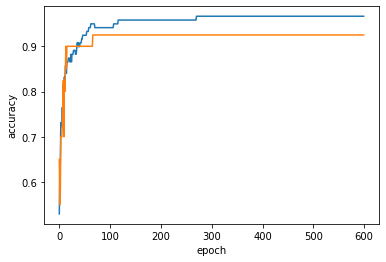

In [ ]:
import matplotlib.pyplot as plt
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show() 

- 초기에는 epoch이 작아 과소적합
- epoch이 100이 넘어가는 순간 훈련세트와 테스트 세트의 점수가 조금씩 벌어짐
- epoch 100 이후에는 과대적합이 나타나는 것으로 보임

In [ ]:
# epoch = 100
sc = SGDClassifier(loss = 'log', max_iter = 100, tol = None, random_state = 42) # tol = None 으로 지정하면 자동으로 멈추지 않고 지정한 max_iter 만큼 무조건 반복
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925


#### 확률적 경사 하강법을 사용한 회귀모델 (참고)
- SGDRegressor
- 사용하는 방법은 SGDClassifier 객체와 동일

In [ ]:
# hinge loss : 서포트 벡터 머신(support vector machine) 알고리즘을 위한 손실 함수
sc = SGDClassifier(loss = 'hinge', max_iter = 100, tol = None, random_state = 42) # loss의 기본값은 'hinge'
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target)) 

0.9495798319327731
0.925
